## K-means Clustering

We cluster our stocks via our first clustering algorithm: K-means. This clustering algorithm groups n features into k clusters in which each feature belongs to the cluster with the nearest mean. The optimal value of k is not known a priori and is an important parameter to determine. Several methods to estimate k that we will run are 
1) Elbow Method
2) Silhouette Score
3) Calinski-Harabasz Index

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('stock_price_table.csv', index_col=0)
print(df.shape)

(1556, 45)


In [2]:
# Standardize the data since all 3 clustering algorithms are sensitive to the scale of the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### 1. Elbow Method

The Elbow Method is a heuristic used in clustering analysis, particularly K-means clustering, to determine the optimal number of clusters (k). The method involves plotting the explained variance as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. It's based on the idea that adding more clusters beyond the necessary number does not significantly improve the fitting of the data.

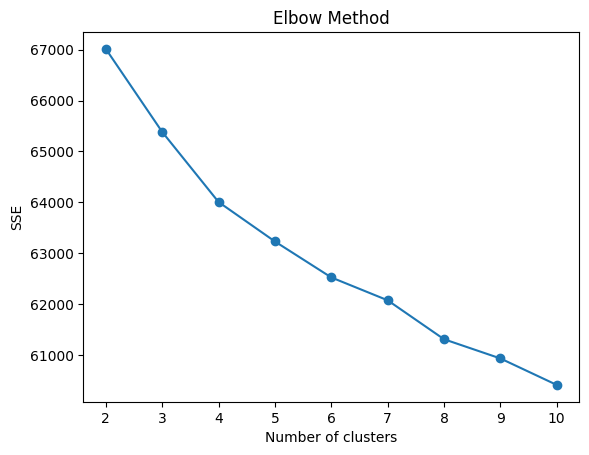

In [3]:
# Use the Elbow Method to find the optimal number of clusters (k)
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the SSE for each k to find the elbow point
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

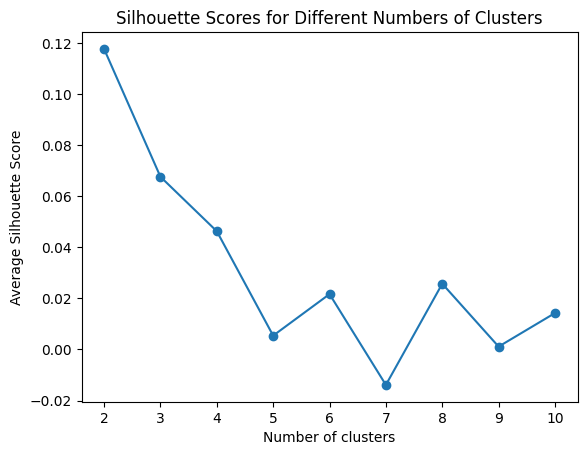

In [4]:
from sklearn.metrics import silhouette_score

silhouette_avg_scores = []

# Calculate silhouette scores for each number of clusters
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(list(range(2, 11)), silhouette_avg_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

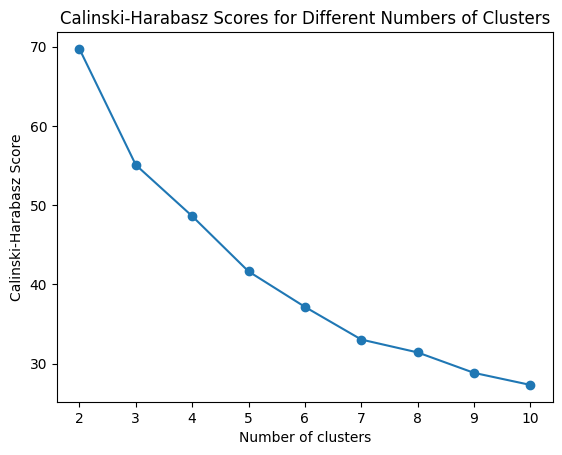

In [5]:
range_n_clusters = list(range(2, 11))
from sklearn.metrics import calinski_harabasz_score


calinski_harabasz_scores = []

# Calculate Calinski-Harabasz scores for each number of clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    score = calinski_harabasz_score(scaled_data, cluster_labels)
    calinski_harabasz_scores.append(score)

# Plot Calinski-Harabasz scores
plt.plot(range_n_clusters, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Different Numbers of Clusters')
plt.show()